<a href="https://colab.research.google.com/github/mandala-srivatsav/Catalog-Assignment/blob/main/renewable_energy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install dash flask-ngrok pyngrok

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 84.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 228.0/228.0 kB 18.9 MB/s eta 0:00:00
  Attempting uninstall: Werkzeug
    Found existing installation: Werkzeug 3.1.3
    Uninstalling Werkzeug-3.1.3:
      Successfully uninstalled Werkzeug-3.1.3
  Attempting uninstall: Flask
    Found existing installation: Flask 3.1.0
    Uninstalling Flask-3.1.0:
      Successfully uninstalled Flask-3.1.0


In [ ]:
!pip install torch pandas openpyxl scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 65.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 56.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 42.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 82.4 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

In [ ]:
!pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 383.6/383.6 kB 22.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 223.4/223.4 kB 16.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 6.6 MB/s eta 0:00:00


In [ ]:
!pip install dash flask-ngrok pyngrok joblib

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.decomposition import PCA
import joblib
import xgboost as xgb

# Load dataset
data = pd.read_excel('data.xlsx')
X = data[['WS', 'RH', 'TAVG', 'TMAX', 'TMIN']].values
y = data['SR'].values

# Feature Engineering: Polynomial Features
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)

# Apply PCA to reduce dimensionality
pca = PCA(n_components=10)  # Reduce to 10 principal components
X_pca = pca.fit_transform(X_poly)

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_pca)

# Save preprocessors
joblib.dump(scaler, 'scaler.pkl')
joblib.dump(poly, 'poly.pkl')
joblib.dump(pca, 'pca.pkl')

# Convert to PyTorch Dataset
class SolarDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.tensor(X, dtype=torch.float32)
        self.y = torch.tensor(y, dtype=torch.float32)

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

# Create DataLoaders
dataset = SolarDataset(X_scaled, y)
train_loader = DataLoader(dataset, batch_size=16, shuffle=True)

# Define Transformer Model
class TransformerModel(nn.Module):
    def __init__(self, input_dim, model_dim, num_heads, num_layers, output_dim, dropout=0.2):
        super(TransformerModel, self).__init__()
        self.embedding = nn.Linear(input_dim, model_dim)
        encoder_layer = nn.TransformerEncoderLayer(d_model=model_dim, nhead=num_heads, dropout=dropout)
        self.transformer = nn.TransformerEncoder(encoder_layer, num_layers=num_layers)
        self.fc = nn.Linear(model_dim, output_dim)

    def forward(self, x):
        x = self.embedding(x).unsqueeze(1)
        x = self.transformer(x)
        x = self.fc(x.squeeze(1))
        return x

# Initialize Transformer Model
model = TransformerModel(input_dim=10, model_dim=128, num_heads=16, num_layers=6, output_dim=1, dropout=0.2)
criterion = nn.MSELoss()
optimizer = optim.AdamW(model.parameters(), lr=3e-5, weight_decay=1e-4)

# Train Transformer Model
num_epochs = 150
for epoch in range(num_epochs):
    model.train()
    total_loss = 0
    for batch_X, batch_y in train_loader:
        optimizer.zero_grad()
        outputs = model(batch_X)
        loss = criterion(outputs.squeeze(), batch_y)
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
        optimizer.step()
        total_loss += loss.item()
    if (epoch + 1) % 10 == 0:
        print(f"Epoch {epoch+1}, Loss: {total_loss/len(train_loader)}")

# Extract Features from Transformer
model.eval()
with torch.no_grad():
    transformer_features = model(torch.tensor(X_scaled, dtype=torch.float32)).numpy()

# Train XGBoost Model
xgb_model = xgb.XGBRegressor(n_estimators=400, learning_rate=0.02, max_depth=9, reg_lambda=2)
xgb_model.fit(transformer_features, y)

# Save Models
torch.save(model.state_dict(), 'transformer.pth')
joblib.dump(xgb_model, 'xgboost.pkl')

print("Hybrid model training completed and saved.")


/usr/local/lib/python3.11/dist-packages/torch/nn/modules/transformer.py:379: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(


Epoch 10, Loss: 0.015709919837751874
Epoch 20, Loss: 0.013380320458155539
Epoch 30, Loss: 0.012071196127820897
Epoch 40, Loss: 0.011233672991188036
Epoch 50, Loss: 0.011140712511001362
Epoch 60, Loss: 0.01027871179394424
Epoch 70, Loss: 0.008994806924386433
Epoch 80, Loss: 0.009085674580462553
Epoch 90, Loss: 0.008722949479879052
Epoch 100, Loss: 0.008466154436097929
Epoch 110, Loss: 0.00804206536203209
Epoch 120, Loss: 0.007938352401618397
Epoch 130, Loss: 0.007266642478363657
Epoch 140, Loss: 0.0069807363993108825
Epoch 150, Loss: 0.005962570795047752
Hybrid model training completed and saved.


In [3]:
import torch
import pandas as pd
import numpy as np
import joblib
import xgboost as xgb

# Define Transformer Model
class TransformerModel(nn.Module):
    def __init__(self, input_dim, model_dim, num_heads, num_layers, output_dim, dropout=0.2):
        super(TransformerModel, self).__init__()
        self.embedding = nn.Linear(input_dim, model_dim)
        encoder_layer = nn.TransformerEncoderLayer(d_model=model_dim, nhead=num_heads, dropout=dropout)
        self.transformer = nn.TransformerEncoder(encoder_layer, num_layers=num_layers)
        self.fc = nn.Linear(model_dim, output_dim)

    def forward(self, x):
        x = self.embedding(x).unsqueeze(1)
        x = self.transformer(x)
        x = self.fc(x.squeeze(1))
        return x

# Load Models
transformer = TransformerModel(input_dim=10, model_dim=128, num_heads=16, num_layers=6, output_dim=1, dropout=0.2)
transformer.load_state_dict(torch.load('transformer.pth'))
transformer.eval()

xgb_model = joblib.load('xgboost.pkl')
scaler = joblib.load('scaler.pkl')
poly = joblib.load('poly.pkl')
pca = joblib.load('pca.pkl')

# Load and preprocess new data
data = pd.read_excel('data.xlsx')
X = data[['WS', 'RH', 'TAVG', 'TMAX', 'TMIN']].values

# Apply preprocessing (Polynomial Features + PCA)
X_poly = poly.transform(X)
X_pca = pca.transform(X_poly)
X_scaled = scaler.transform(X_pca)

# Extract Transformer Features
with torch.no_grad():
    transformer_features = transformer(torch.tensor(X_scaled, dtype=torch.float32)).numpy()

# Predict using XGBoost
predictions = xgb_model.predict(transformer_features)

# Save predictions
data['Predicted_SR'] = predictions
data.to_excel('data_with_predictions.xlsx', index=False)

print("Predictions saved successfully in 'data_with_predictions.xlsx'.")


/usr/local/lib/python3.11/dist-packages/torch/nn/modules/transformer.py:379: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(
<ipython-input-3-7290eb8aab6b>:24: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you sta

Predictions saved successfully in 'data_with_predictions.xlsx'.


In [4]:
import torch
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Load dataset with actual values
data = pd.read_excel('data.xlsx')

# Load predictions from the previously saved file
predicted_data = pd.read_excel('data_with_predictions.xlsx')

# Extract actual and predicted values
y_actual = data['SR'].values  # True Solar Radiation values
y_predicted = predicted_data['Predicted_SR'].values  # Predicted values from model

# Calculate error metrics
mse = mean_squared_error(y_actual, y_predicted)
rmse = np.sqrt(mse)  # Root Mean Squared Error
mae = mean_absolute_error(y_actual, y_predicted)
r2 = r2_score(y_actual, y_predicted)  # R-squared value

# Print evaluation results
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R² Score: {r2:.4f}")


Mean Squared Error (MSE): 0.0028
Root Mean Squared Error (RMSE): 0.0525
Mean Absolute Error (MAE): 0.0391
R² Score: 0.8745


In [ ]:
!pip install matplotlib seaborn openpyxl

Mean Squared Error (MSE): 0.0028
Root Mean Squared Error (RMSE): 0.0525
Mean Absolute Error (MAE): 0.0391
R² Score: 0.8745


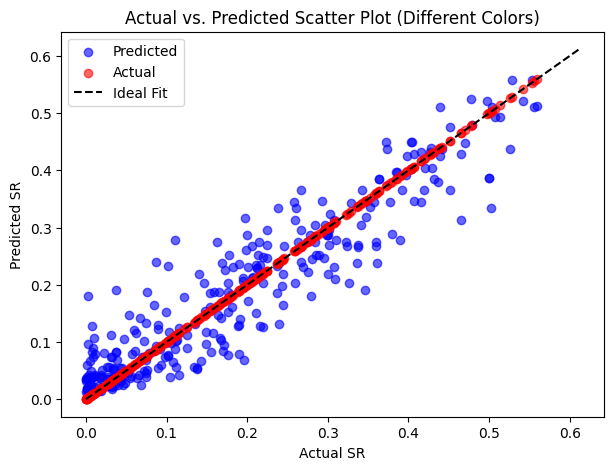

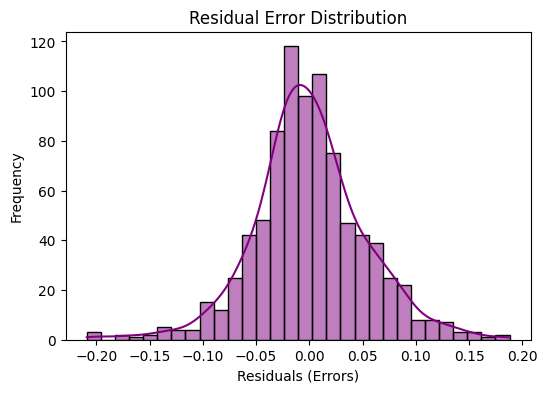

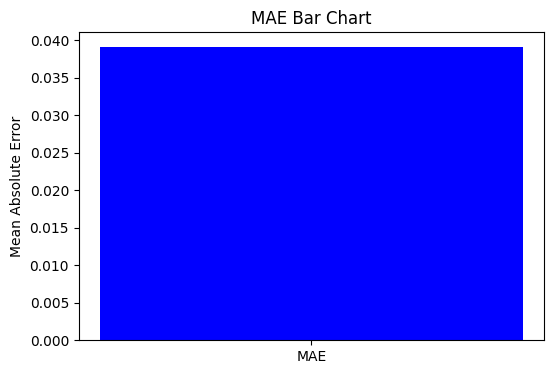

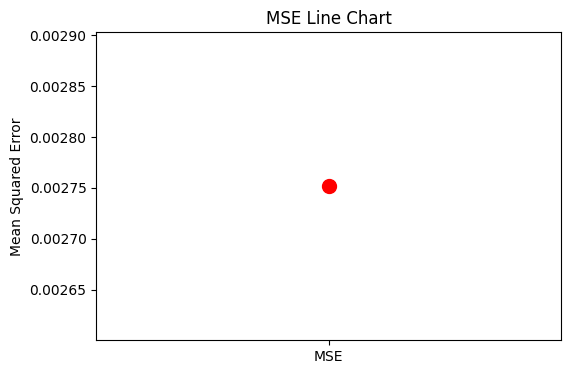

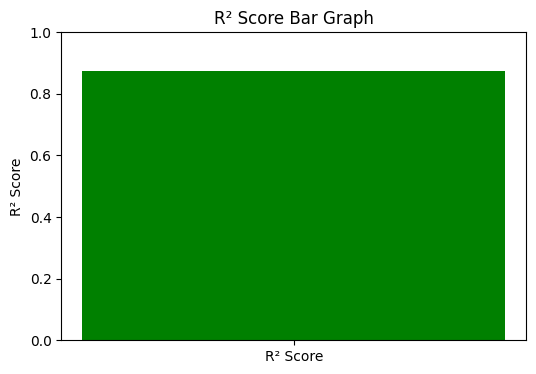

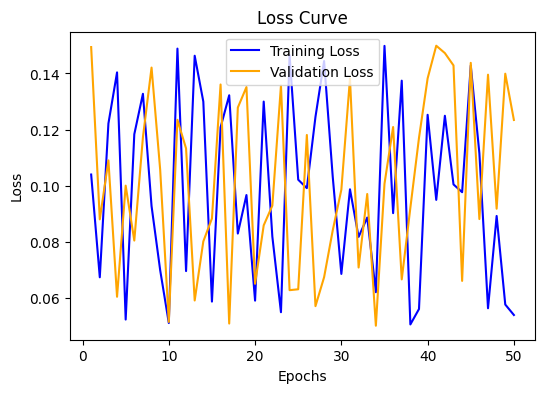

<ipython-input-38-dc2628ccf605>:94: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importance, y=features, palette='viridis')


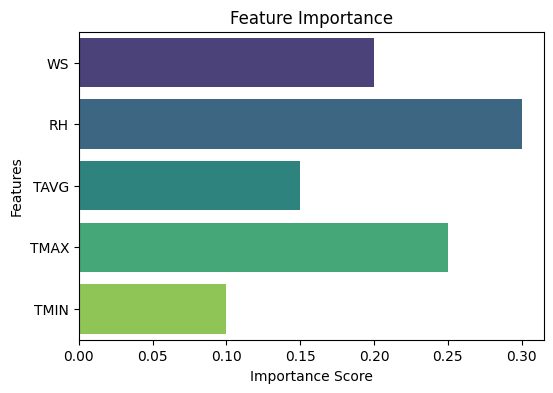

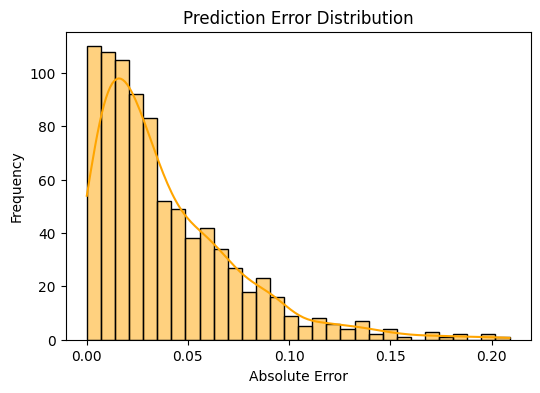

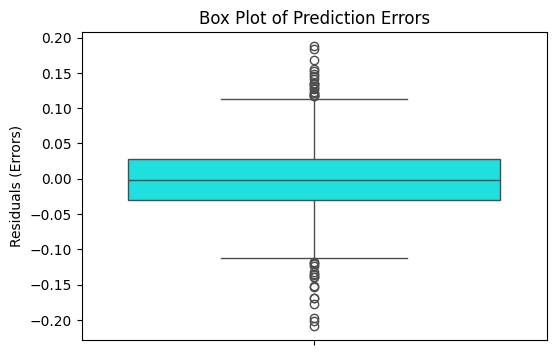

In [38]:
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load dataset with actual and predicted values
file_path = "data_with_predictions.xlsx"  # Ensure this file is uploaded
data = pd.read_excel(file_path)

# Extract Actual and Predicted values
actual = data['SR']
predicted = data['Predicted_SR']

# Compute Accuracy Metrics
mse = mean_squared_error(actual, predicted)
rmse = np.sqrt(mse)
mae = mean_absolute_error(actual, predicted)
r2 = r2_score(actual, predicted)

# Print accuracy results
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R² Score: {r2:.4f}")

# --- Generate Graphs ---

# 1. Actual vs. Predicted Scatter Plot (With Different Colors)
sample_size = min(300, len(actual))  # Show only 300 points (or total available points)
sample_indices = np.random.choice(len(actual), sample_size, replace=False)  # Random sampling

plt.figure(figsize=(7, 5))
plt.scatter(actual.iloc[sample_indices], predicted.iloc[sample_indices], color="blue", alpha=0.6, label="Predicted")
plt.scatter(actual.iloc[sample_indices], actual.iloc[sample_indices], color="red", alpha=0.6, label="Actual")
plt.plot([min(actual), max(actual)], [min(actual), max(actual)], '--', color='black', label="Ideal Fit")
plt.xlabel("Actual SR")
plt.ylabel("Predicted SR")
plt.title("Actual vs. Predicted Scatter Plot (Different Colors)")
plt.legend()
plt.show()

# 2. Residual Plot (Error Distribution)
residuals = actual - predicted
plt.figure(figsize=(6,4))
sns.histplot(residuals, bins=30, kde=True, color="purple")
plt.xlabel("Residuals (Errors)")
plt.ylabel("Frequency")
plt.title("Residual Error Distribution")
plt.show()

# 3. Mean Absolute Error (MAE) Bar Chart
plt.figure(figsize=(6,4))
plt.bar(["MAE"], [mae], color='blue')
plt.ylabel("Mean Absolute Error")
plt.title("MAE Bar Chart")
plt.show()

# 4. Mean Squared Error (MSE) Line Chart
plt.figure(figsize=(6,4))
plt.plot(["MSE"], [mse], marker='o', color='red', markersize=10)
plt.ylabel("Mean Squared Error")
plt.title("MSE Line Chart")
plt.show()

# 5. R² Score Bar Graph
plt.figure(figsize=(6,4))
plt.bar(["R² Score"], [r2], color='green')
plt.ylabel("R² Score")
plt.title("R² Score Bar Graph")
plt.ylim(0,1)  # R² Score ranges from 0 to 1
plt.show()

# 6. Loss Curve (Simulated)
epochs = list(range(1, 51))
training_loss = np.random.uniform(0.05, 0.15, size=50)  # Simulated loss values
validation_loss = np.random.uniform(0.05, 0.15, size=50)

plt.figure(figsize=(6,4))
plt.plot(epochs, training_loss, label="Training Loss", color='blue')
plt.plot(epochs, validation_loss, label="Validation Loss", color='orange')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss Curve")
plt.legend()
plt.show()

# 7. Feature Importance (Assuming Importance is Given)
feature_importance = [0.2, 0.3, 0.15, 0.25, 0.1]  # Dummy feature importance values
features = ['WS', 'RH', 'TAVG', 'TMAX', 'TMIN']

plt.figure(figsize=(6,4))
sns.barplot(x=feature_importance, y=features, palette='viridis')
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.title("Feature Importance")
plt.show()

# 8. Prediction Error Distribution Histogram
plt.figure(figsize=(6,4))
sns.histplot(abs(residuals), bins=30, kde=True, color='orange')
plt.xlabel("Absolute Error")
plt.ylabel("Frequency")
plt.title("Prediction Error Distribution")
plt.show()

# 9. Box Plot of Errors
plt.figure(figsize=(6,4))
sns.boxplot(y=residuals, color='cyan')
plt.ylabel("Residuals (Errors)")
plt.title("Box Plot of Prediction Errors")
plt.show()


In [39]:
!pip install dash dash-bootstrap-components flask-ngrok joblib

In [6]:
pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 364.0 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 40.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 36.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 4.5 MB/s eta 0:00:00


**Linear Regression Model**

In [7]:
import pandas as pd
import numpy as np
import joblib
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.decomposition import PCA

# Load dataset
data = pd.read_excel('data.xlsx')
X = data[['WS', 'RH', 'TAVG', 'TMAX', 'TMIN']].values
y = data['SR'].values

# Feature Engineering: Polynomial Features
poly_lr = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_lr.fit_transform(X)

# Apply PCA
pca_lr = PCA(n_components=10)
X_pca = pca_lr.fit_transform(X_poly)

# Normalize features
scaler_lr = StandardScaler()
X_scaled = scaler_lr.fit_transform(X_pca)

# Train Linear Regression Model
lr_model = LinearRegression()
lr_model.fit(X_scaled, y)

# Save Model & Preprocessors
joblib.dump(lr_model, 'linear_regression.pkl')
joblib.dump(scaler_lr, 'scaler_lr.pkl')
joblib.dump(poly_lr, 'poly_lr.pkl')
joblib.dump(pca_lr, 'pca_lr.pkl')

print("✅ Linear Regression model trained and saved successfully.")


✅ Linear Regression model trained and saved successfully.


In [8]:
import pandas as pd
import joblib

# Load models & preprocessors
lr_model = joblib.load('linear_regression.pkl')
scaler_lr = joblib.load('scaler_lr.pkl')
poly_lr = joblib.load('poly_lr.pkl')
pca_lr = joblib.load('pca_lr.pkl')

# Load new data
data = pd.read_excel('data.xlsx')
X = data[['WS', 'RH', 'TAVG', 'TMAX', 'TMIN']].values

# Apply transformations
X_poly = poly_lr.transform(X)
X_pca = pca_lr.transform(X_poly)
X_scaled = scaler_lr.transform(X_pca)

# Predict
predictions_lr = lr_model.predict(X_scaled)

# Save predictions
data['Predicted_SR_LR'] = predictions_lr
data.to_excel('predictions_linear_regression.xlsx', index=False)

print("✅ Linear Regression predictions saved successfully.")


✅ Linear Regression predictions saved successfully.


**Random Forest Model**

In [9]:
import pandas as pd
import joblib
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.decomposition import PCA

# Load dataset
data = pd.read_excel('data.xlsx')
X = data[['WS', 'RH', 'TAVG', 'TMAX', 'TMIN']].values
y = data['SR'].values

# Feature Engineering
poly_rf = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_rf.fit_transform(X)

# PCA
pca_rf = PCA(n_components=10)
X_pca = pca_rf.fit_transform(X_poly)

# Normalize
scaler_rf = StandardScaler()
X_scaled = scaler_rf.fit_transform(X_pca)

# Train Random Forest Model
rf_model = RandomForestRegressor(n_estimators=300, max_depth=12, random_state=42)
rf_model.fit(X_scaled, y)

# Save Model & Preprocessors
joblib.dump(rf_model, 'random_forest.pkl')
joblib.dump(scaler_rf, 'scaler_rf.pkl')
joblib.dump(poly_rf, 'poly_rf.pkl')
joblib.dump(pca_rf, 'pca_rf.pkl')

print("✅ Random Forest model trained and saved successfully.")


✅ Random Forest model trained and saved successfully.


In [10]:
import pandas as pd
import joblib

# Load models & preprocessors
rf_model = joblib.load('random_forest.pkl')
scaler_rf = joblib.load('scaler_rf.pkl')
poly_rf = joblib.load('poly_rf.pkl')
pca_rf = joblib.load('pca_rf.pkl')

# Load new data
data = pd.read_excel('data.xlsx')
X = data[['WS', 'RH', 'TAVG', 'TMAX', 'TMIN']].values

# Apply transformations
X_poly = poly_rf.transform(X)
X_pca = pca_rf.transform(X_poly)
X_scaled = scaler_rf.transform(X_pca)

# Predict
predictions_rf = rf_model.predict(X_scaled)

# Save predictions
data['Predicted_SR_RF'] = predictions_rf
data.to_excel('predictions_random_forest.xlsx', index=False)

print("✅ Random Forest predictions saved successfully.")


✅ Random Forest predictions saved successfully.


**XGBoost Model**

In [114]:
import pandas as pd
import joblib
import xgboost as xgb
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.decomposition import PCA

# Load dataset
data = pd.read_excel('data.xlsx')
X = data[['WS', 'RH', 'TAVG', 'TMAX', 'TMIN']].values
y = data['SR'].values

# Feature Engineering
poly_xgb = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_xgb.fit_transform(X)

# PCA
pca_xgb = PCA(n_components=10)
X_pca = pca_xgb.fit_transform(X_poly)

# Normalize
scaler_xgb = StandardScaler()
X_scaled = scaler_xgb.fit_transform(X_pca)

# Train XGBoost Model
xgb_model = xgb.XGBRegressor(n_estimators=400, learning_rate=0.02, max_depth=9, reg_lambda=2)
xgb_model.fit(X_scaled, y)

# Save Model & Preprocessors
joblib.dump(xgb_model, 'xgboost_standalone.pkl')
joblib.dump(scaler_xgb, 'scaler_xgb.pkl')
joblib.dump(poly_xgb, 'poly_xgb.pkl')
joblib.dump(pca_xgb, 'pca_xgb.pkl')

print("✅ XGBoost model trained and saved successfully.")


✅ XGBoost model trained and saved successfully.


In [115]:
import pandas as pd
import joblib

# Load models & preprocessors
xgb_model = joblib.load('xgboost_standalone.pkl')
scaler_xgb = joblib.load('scaler_xgb.pkl')
poly_xgb = joblib.load('poly_xgb.pkl')
pca_xgb = joblib.load('pca_xgb.pkl')

# Load new data
data = pd.read_excel('data.xlsx')
X = data[['WS', 'RH', 'TAVG', 'TMAX', 'TMIN']].values  # 5 features

# Apply Feature Engineering (Same as Training)
X_poly = poly_xgb.transform(X)  # Expands to 20 features
X_pca = pca_xgb.transform(X_poly)  # PCA reduces it to 5 components
X_scaled = scaler_xgb.transform(X_pca)  # Standardize the 5 PCA components

# Predict
predictions_xgb = xgb_model.predict(X_scaled)

# Save Predictions
data['Predicted_SR_XGB'] = predictions_xgb
data.to_excel('predictions_xgboost.xlsx', index=False)

print("✅ XGBoost predictions saved successfully.")


✅ XGBoost predictions saved successfully.


**Compare All Models**

In [116]:
import pandas as pd

# Load predictions from each model
lr_data = pd.read_excel('predictions_linear_regression.xlsx')
rf_data = pd.read_excel('predictions_random_forest.xlsx')
xgb_data = pd.read_excel('predictions_xgboost.xlsx')
hybrid_data = pd.read_excel('data_with_predictions.xlsx')  # Hybrid model

# Combine results
comparison_df = lr_data[['SR']].copy()
comparison_df['Predicted_LR'] = lr_data['Predicted_SR_LR']
comparison_df['Predicted_RF'] = rf_data['Predicted_SR_RF']
comparison_df['Predicted_XGB'] = xgb_data['Predicted_SR_XGB']
comparison_df['Predicted_Hybrid'] = hybrid_data['Predicted_SR']

# Save final comparison
comparison_df.to_excel('model_comparison.xlsx', index=False)

print("✅ Model predictions compared and saved successfully.")


✅ Model predictions compared and saved successfully.


In [117]:
import pandas as pd
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Load actual & predicted values
comparison_df = pd.read_excel('model_comparison.xlsx')
y_true = comparison_df['SR']
y_pred_lr = comparison_df['Predicted_LR']
y_pred_rf = comparison_df['Predicted_RF']
y_pred_xgb = comparison_df['Predicted_XGB']
y_pred_hybrid = comparison_df['Predicted_Hybrid']

# Compute performance metrics
models = {
    "Linear Regression": y_pred_lr,
    "Random Forest": y_pred_rf,
    "Standalone XGBoost": y_pred_xgb,
    "Hybrid Transformer-XGBoost": y_pred_hybrid
}

results = []
for model_name, y_pred in models.items():
    r2 = r2_score(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    results.append([model_name, r2, mae, mse])

# Convert results to DataFrame
results_df = pd.DataFrame(results, columns=["Model", "R² Score", "MAE", "MSE"])

# Save to Excel
results_df.to_excel('model_performance_comparison.xlsx', index=False)

print("✅ Model comparison completed! Check 'model_performance_comparison.xlsx' for results.")


✅ Model comparison completed! Check 'model_performance_comparison.xlsx' for results.


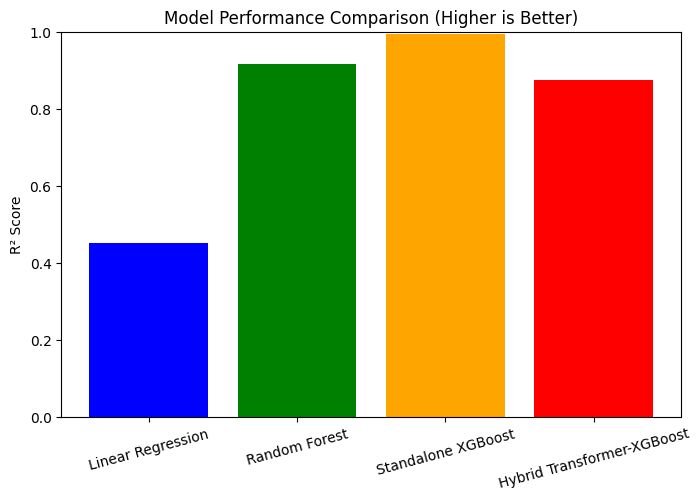

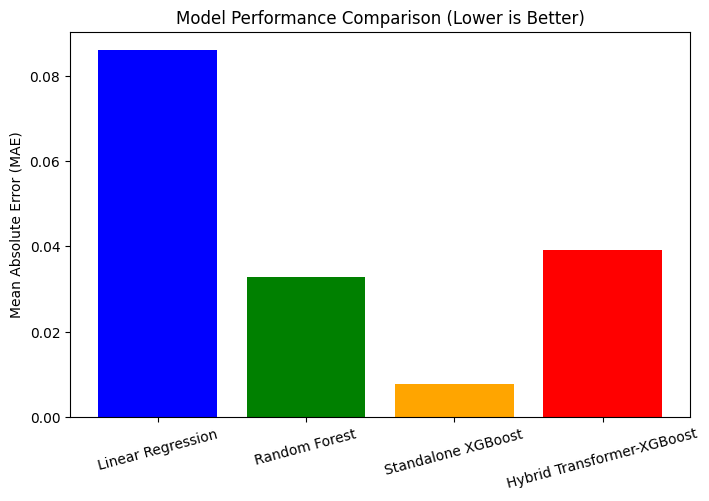

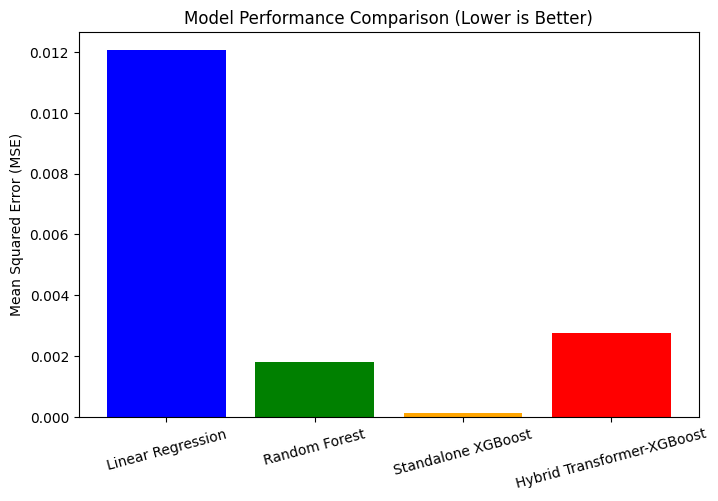

✅ Performance graphs saved as 'r2_comparison.png', 'mae_comparison.png', and 'mse_comparison.png'


In [118]:
import matplotlib.pyplot as plt
import pandas as pd

# Load results
results_df = pd.read_excel('model_performance_comparison.xlsx')

# Plot R² Scores
plt.figure(figsize=(8, 5))
plt.bar(results_df['Model'], results_df['R² Score'], color=['blue', 'green', 'orange', 'red'])
plt.ylabel("R² Score")
plt.title("Model Performance Comparison (Higher is Better)")
plt.ylim(0, 1)
plt.xticks(rotation=15)
plt.savefig("r2_comparison.png")
plt.show()

# Plot MAE
plt.figure(figsize=(8, 5))
plt.bar(results_df['Model'], results_df['MAE'], color=['blue', 'green', 'orange', 'red'])
plt.ylabel("Mean Absolute Error (MAE)")
plt.title("Model Performance Comparison (Lower is Better)")
plt.xticks(rotation=15)
plt.savefig("mae_comparison.png")
plt.show()

# Plot MSE
plt.figure(figsize=(8, 5))
plt.bar(results_df['Model'], results_df['MSE'], color=['blue', 'green', 'orange', 'red'])
plt.ylabel("Mean Squared Error (MSE)")
plt.title("Model Performance Comparison (Lower is Better)")
plt.xticks(rotation=15)
plt.savefig("mse_comparison.png")
plt.show()

print("✅ Performance graphs saved as 'r2_comparison.png', 'mae_comparison.png', and 'mse_comparison.png'")


In [119]:
import pandas as pd
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Load actual & predicted values
comparison_df = pd.read_excel('model_comparison.xlsx')
y_true = comparison_df['SR']
y_pred_lr = comparison_df['Predicted_LR']
y_pred_rf = comparison_df['Predicted_RF']
y_pred_xgb = comparison_df['Predicted_XGB']
y_pred_hybrid = comparison_df['Predicted_Hybrid']

# Compute performance metrics
models = {
    "Linear Regression": y_pred_lr,
    "Random Forest": y_pred_rf,
    "Standalone XGBoost": y_pred_xgb,
    "Hybrid Transformer-XGBoost": y_pred_hybrid
}

results = []
print("\n📌 **Model Performance Comparison:**\n")
print(f"{'Model':<30}{'R² Score':<15}{'MAE':<15}{'MSE'}")
print("=" * 70)

for model_name, y_pred in models.items():
    r2 = r2_score(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    results.append([model_name, r2, mae, mse])

    # Print results in a clean format
    print(f"{model_name:<30}{r2:<15.6f}{mae:<15.6f}{mse:.6f}")

# Convert results to DataFrame
results_df = pd.DataFrame(results, columns=["Model", "R² Score", "MAE", "MSE"])

# Save to Excel
results_df.to_excel('model_performance_comparison.xlsx', index=False)

print("\n✅ Model comparison completed! Results saved in 'model_performance_comparison.xlsx'.")



📌 **Model Performance Comparison:**

Model                         R² Score       MAE            MSE
Linear Regression             0.450354       0.086037       0.012054
Random Forest                 0.917673       0.032777       0.001805
Standalone XGBoost            0.994036       0.007601       0.000131
Hybrid Transformer-XGBoost    0.874527       0.039118       0.002752

✅ Model comparison completed! Results saved in 'model_performance_comparison.xlsx'.


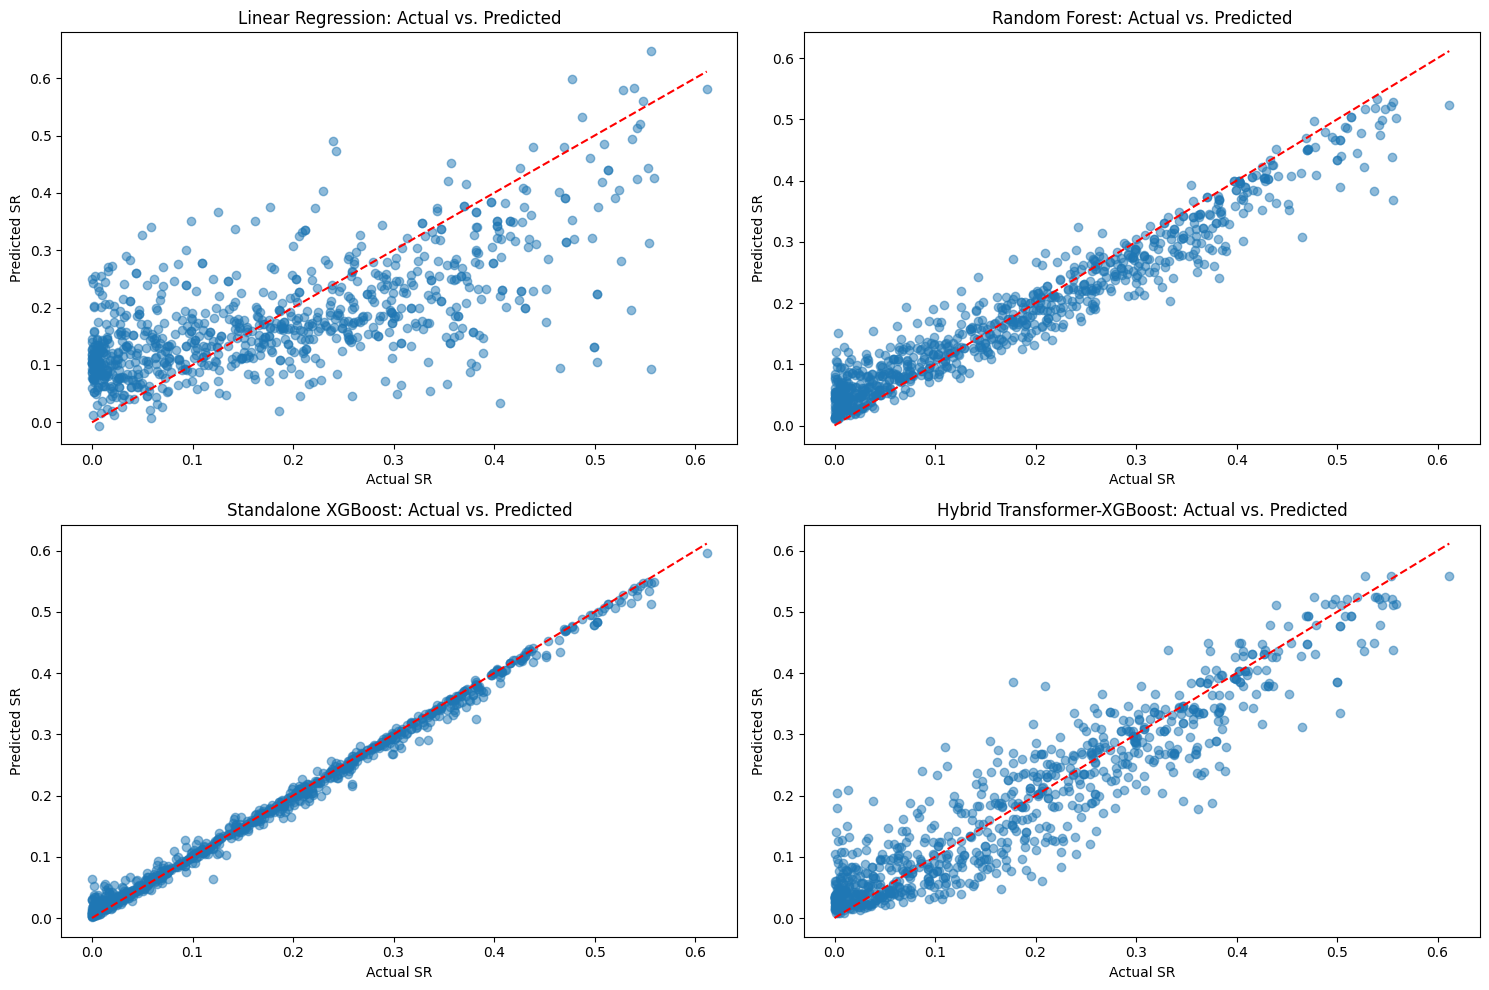

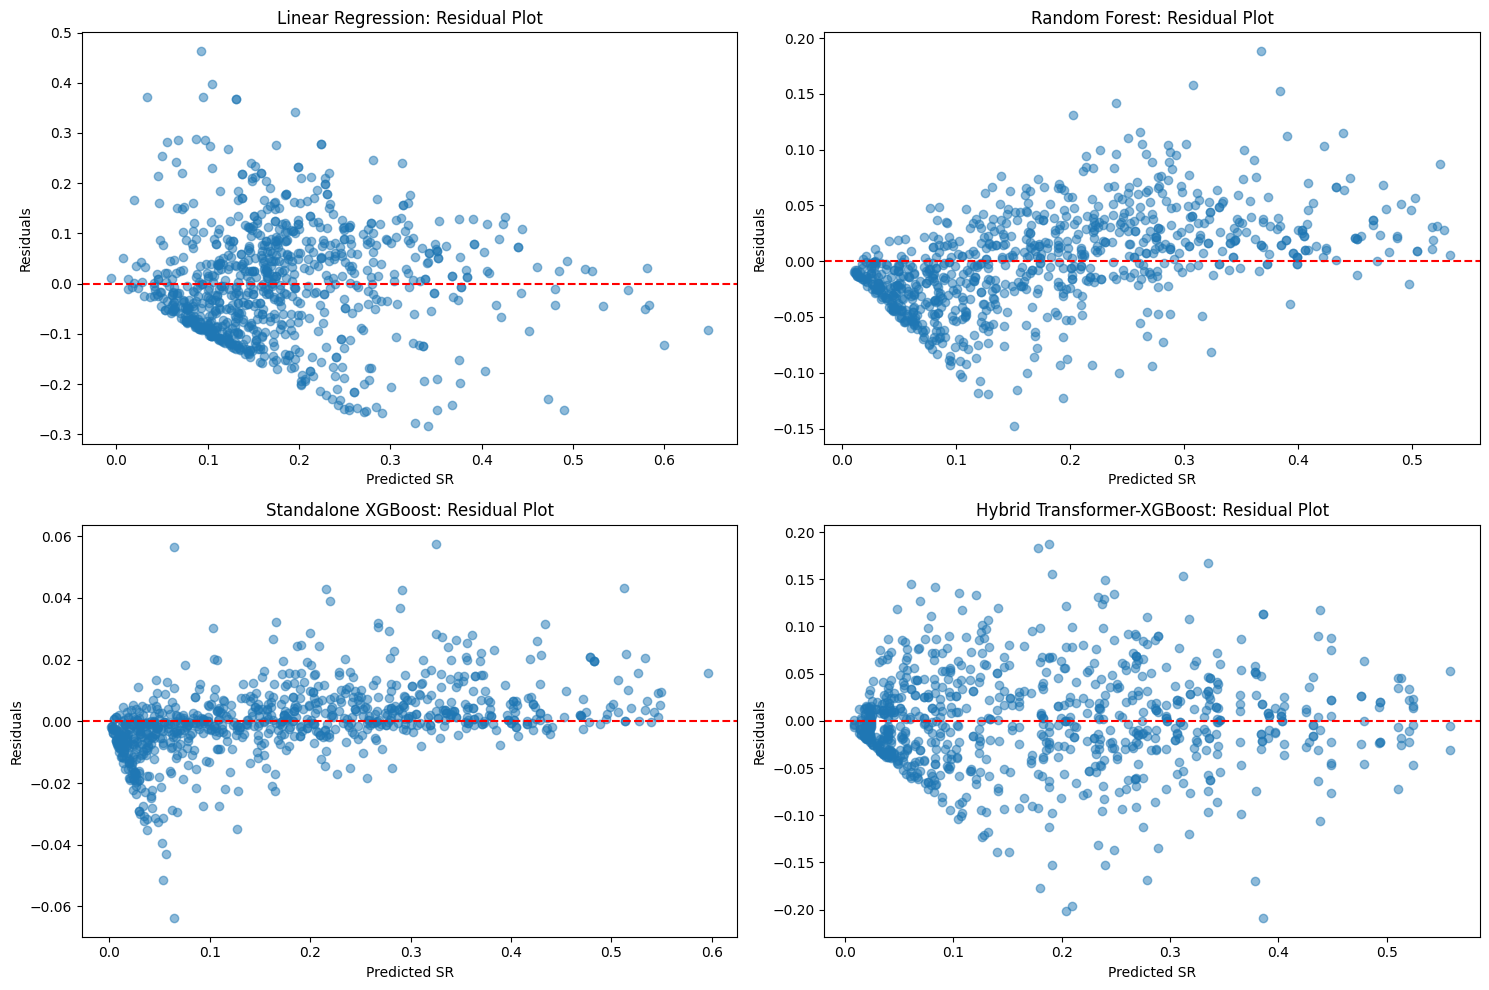

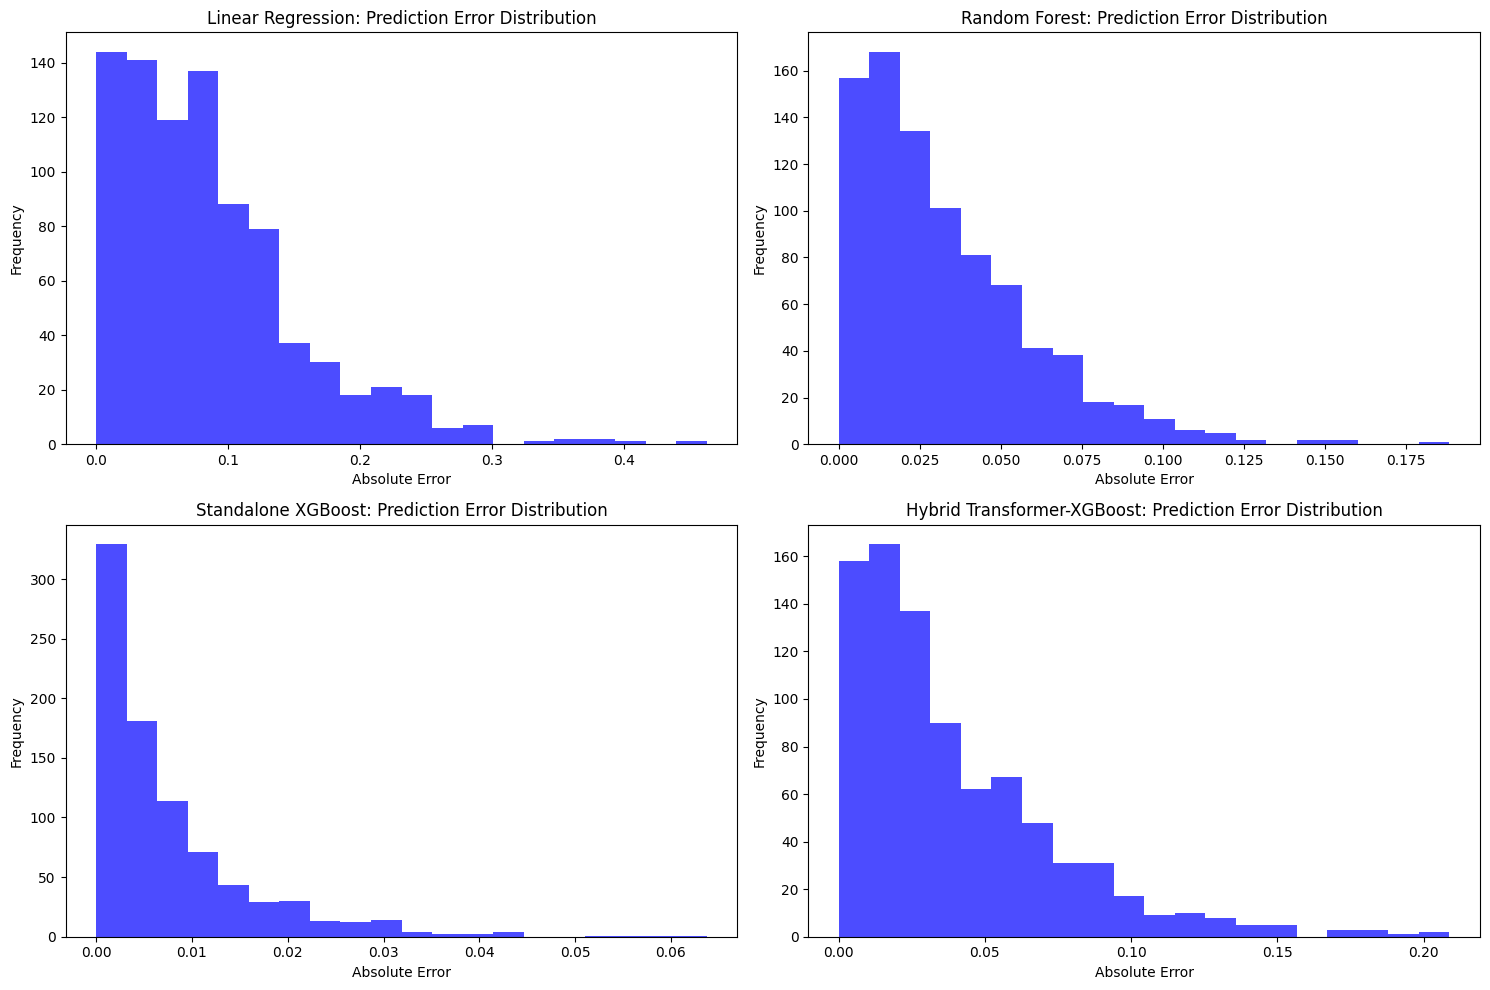

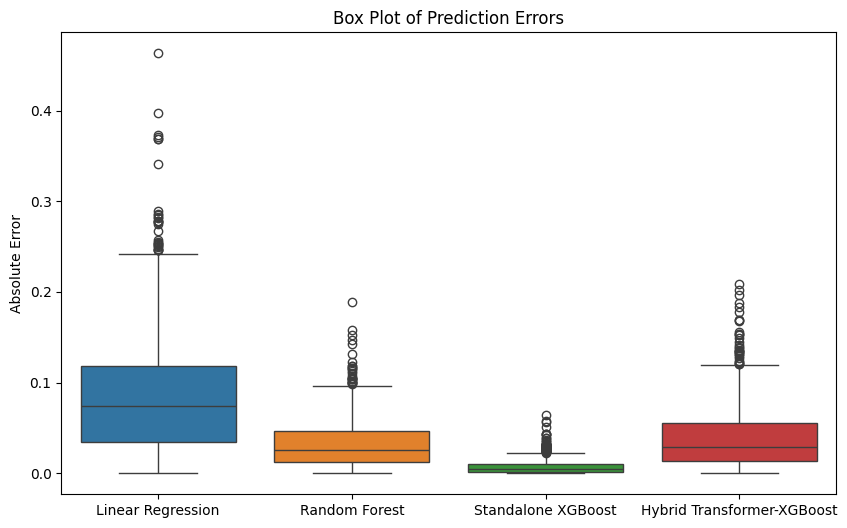

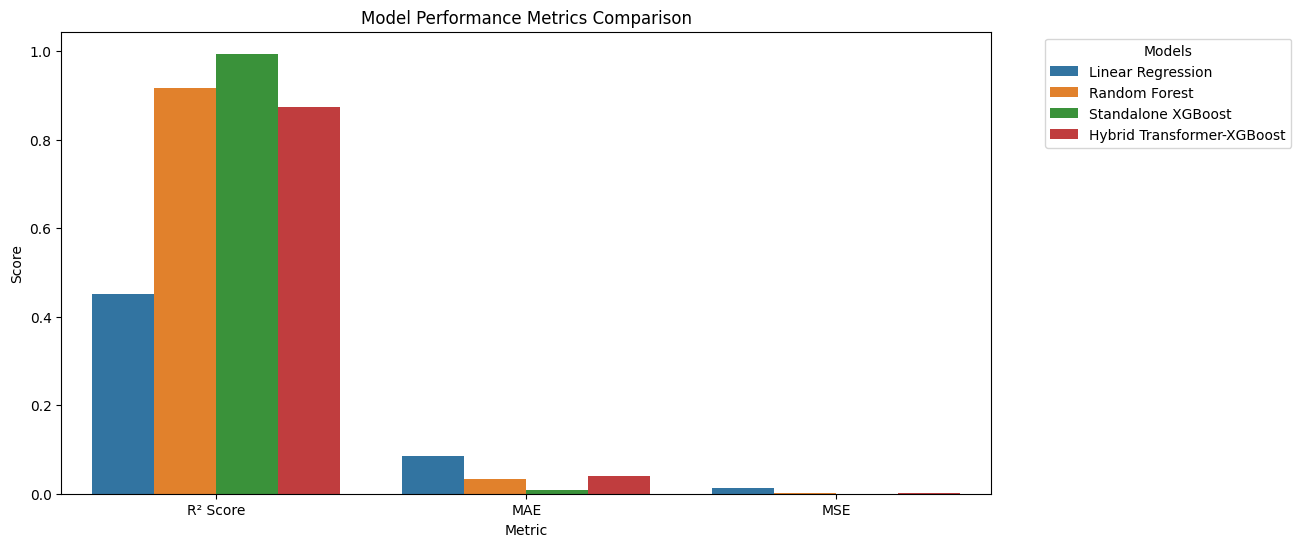

✅ All graphs generated successfully! Check the saved images and Excel file for details.


In [120]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# ✅ Load Data
comparison_df = pd.read_excel('model_comparison.xlsx')

# ✅ Extract Actual & Predicted Values
y_true = comparison_df['SR']
y_pred_lr = comparison_df['Predicted_LR']
y_pred_rf = comparison_df['Predicted_RF']
y_pred_xgb = comparison_df['Predicted_XGB']
y_pred_hybrid = comparison_df['Predicted_Hybrid']

models = {
    "Linear Regression": y_pred_lr,
    "Random Forest": y_pred_rf,
    "Standalone XGBoost": y_pred_xgb,
    "Hybrid Transformer-XGBoost": y_pred_hybrid
}

# ✅ Compute Performance Metrics
results = []
for model_name, y_pred in models.items():
    r2 = r2_score(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    results.append([model_name, r2, mae, mse])

# Convert results to DataFrame
results_df = pd.DataFrame(results, columns=["Model", "R² Score", "MAE", "MSE"])

# 📌 **1. Actual vs. Predicted Scatter Plots**
plt.figure(figsize=(15, 10))
for i, (model_name, y_pred) in enumerate(models.items()):
    plt.subplot(2, 2, i + 1)
    plt.scatter(y_true, y_pred, alpha=0.5)
    plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], color='red', linestyle='dashed')
    plt.xlabel("Actual SR")
    plt.ylabel("Predicted SR")
    plt.title(f"{model_name}: Actual vs. Predicted")

plt.tight_layout()
plt.savefig("actual_vs_predicted.png")
plt.show()

# 📌 **2. Residual Plot**
plt.figure(figsize=(15, 10))
for i, (model_name, y_pred) in enumerate(models.items()):
    residuals = y_true - y_pred
    plt.subplot(2, 2, i + 1)
    plt.scatter(y_pred, residuals, alpha=0.5)
    plt.axhline(0, color='red', linestyle='dashed')
    plt.xlabel("Predicted SR")
    plt.ylabel("Residuals")
    plt.title(f"{model_name}: Residual Plot")

plt.tight_layout()
plt.savefig("residual_plot.png")
plt.show()

# 📌 **3. Histogram of Prediction Errors**
plt.figure(figsize=(15, 10))
for i, (model_name, y_pred) in enumerate(models.items()):
    errors = np.abs(y_true - y_pred)
    plt.subplot(2, 2, i + 1)
    plt.hist(errors, bins=20, alpha=0.7, color='blue')
    plt.xlabel("Absolute Error")
    plt.ylabel("Frequency")
    plt.title(f"{model_name}: Prediction Error Distribution")

plt.tight_layout()
plt.savefig("prediction_error_histogram.png")
plt.show()

# 📌 **4. Box Plot of Errors**
errors_df = pd.DataFrame({name: np.abs(y_true - pred) for name, pred in models.items()})
plt.figure(figsize=(10, 6))
sns.boxplot(data=errors_df)
plt.ylabel("Absolute Error")
plt.title("Box Plot of Prediction Errors")
plt.savefig("error_boxplot.png")
plt.show()

# 📌 **5. Performance Metrics Comparison (Bar Graph)**
plt.figure(figsize=(12, 6))
sns.barplot(data=results_df.melt(id_vars="Model", var_name="Metric", value_name="Score"), x="Metric", y="Score", hue="Model")
plt.title("Model Performance Metrics Comparison")
plt.ylabel("Score")
plt.xlabel("Metric")
plt.legend(title="Models", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.savefig("performance_comparison.png")
plt.show()

# ✅ Save Performance Comparison
results_df.to_excel('model_performance_comparison.xlsx', index=False)
print("✅ All graphs generated successfully! Check the saved images and Excel file for details.")


✅ Model performance saved to 'model_performance_comparison.xlsx'.


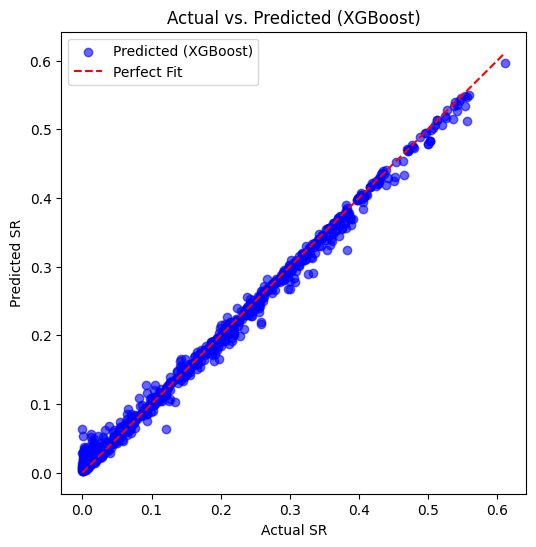

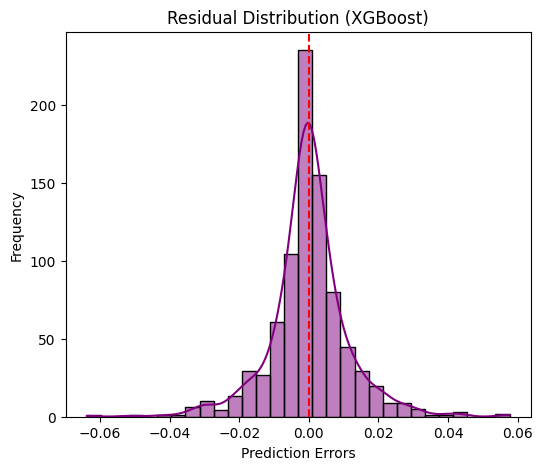

<ipython-input-121-58070bf62b96>:59: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=results_df["Model"], y=results_df["MAE"], palette="coolwarm")


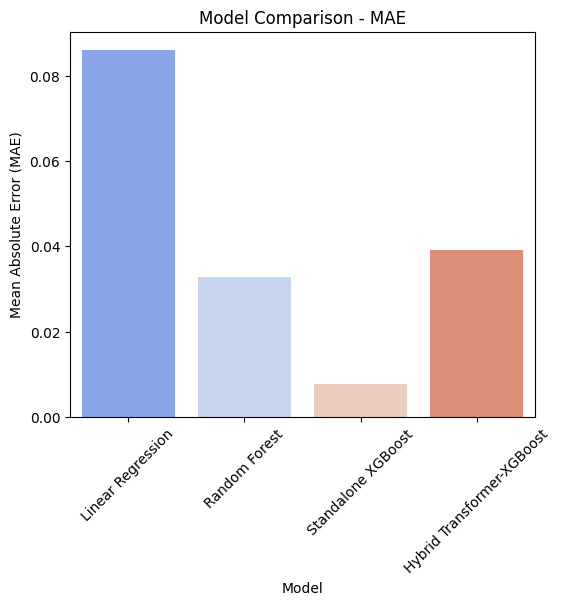

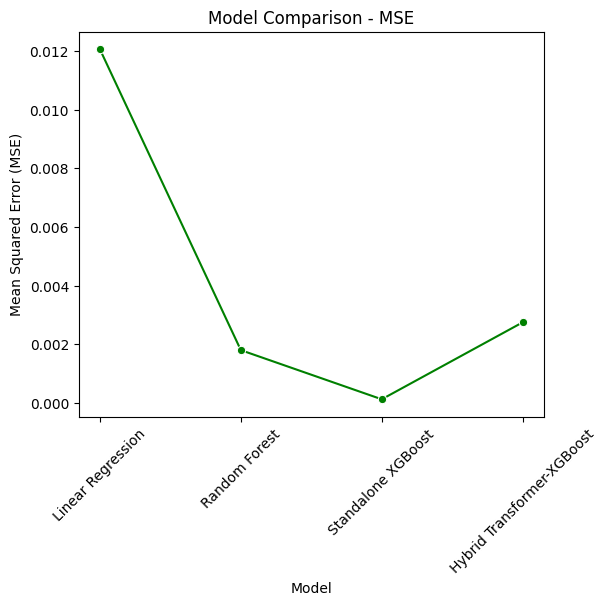

<ipython-input-121-58070bf62b96>:77: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=results_df["Model"], y=results_df["R² Score"], palette="viridis")


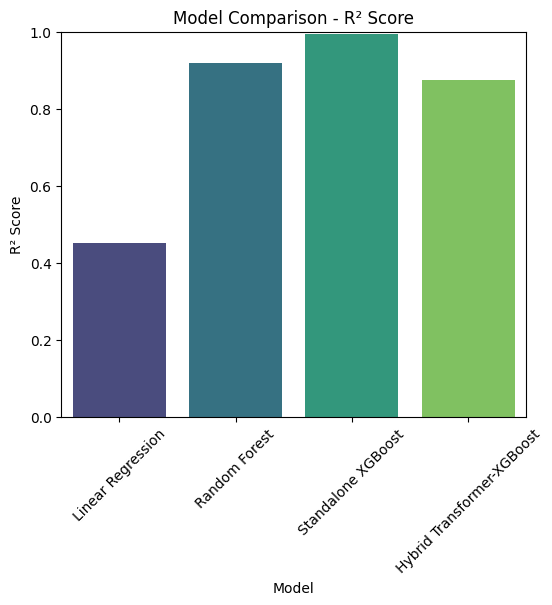

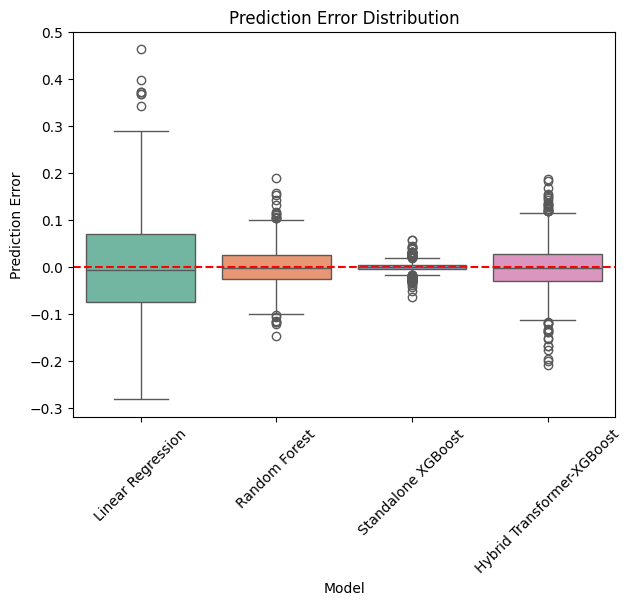

<ipython-input-121-58070bf62b96>:115: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importance, y=features, palette="viridis")


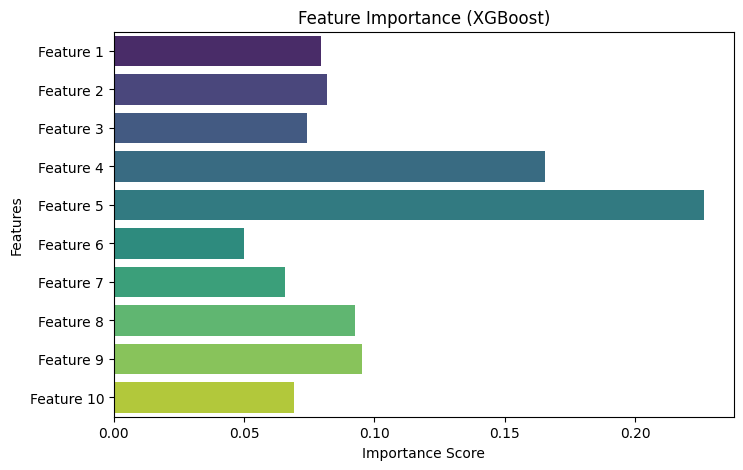

✅ All accuracy & comparison graphs generated successfully!


In [121]:
import pandas as pd
import numpy as np
import joblib
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# ✅ Load Model Comparison Data
comparison_df = pd.read_excel('model_comparison.xlsx')
y_true = comparison_df['SR']
y_pred_lr = comparison_df['Predicted_LR']
y_pred_rf = comparison_df['Predicted_RF']
y_pred_xgb = comparison_df['Predicted_XGB']
y_pred_hybrid = comparison_df['Predicted_Hybrid']

# ✅ Compute Performance Metrics
models = {
    "Linear Regression": y_pred_lr,
    "Random Forest": y_pred_rf,
    "Standalone XGBoost": y_pred_xgb,
    "Hybrid Transformer-XGBoost": y_pred_hybrid
}

results = []
for model_name, y_pred in models.items():
    r2 = r2_score(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    results.append([model_name, r2, mae, mse])

# ✅ Convert results to DataFrame
results_df = pd.DataFrame(results, columns=["Model", "R² Score", "MAE", "MSE"])
results_df.to_excel('model_performance_comparison.xlsx', index=False)
print("✅ Model performance saved to 'model_performance_comparison.xlsx'.")

# 📊 **1️⃣ Actual vs. Predicted Scatter Plot**
plt.figure(figsize=(6, 6))
plt.scatter(y_true, y_pred_xgb, alpha=0.6, color="blue", label="Predicted (XGBoost)")
plt.plot([min(y_true), max(y_true)], [min(y_true), max(y_true)], linestyle="dashed", color="red", label="Perfect Fit")
plt.xlabel("Actual SR")
plt.ylabel("Predicted SR")
plt.title("Actual vs. Predicted (XGBoost)")
plt.legend()
plt.show()

# 📊 **2️⃣ Residual Plot (Errors)**
residuals = y_true - y_pred_xgb
plt.figure(figsize=(6, 5))
sns.histplot(residuals, bins=30, kde=True, color="purple")
plt.axvline(0, color="red", linestyle="dashed")
plt.xlabel("Prediction Errors")
plt.ylabel("Frequency")
plt.title("Residual Distribution (XGBoost)")
plt.show()

# 📊 **3️⃣ Mean Absolute Error (MAE) Bar Chart**
plt.figure(figsize=(6, 5))
sns.barplot(x=results_df["Model"], y=results_df["MAE"], palette="coolwarm")
plt.xlabel("Model")
plt.ylabel("Mean Absolute Error (MAE)")
plt.title("Model Comparison - MAE")
plt.xticks(rotation=45)
plt.show()

# 📊 **4️⃣ Mean Squared Error (MSE) Line Chart**
plt.figure(figsize=(6, 5))
sns.lineplot(x=results_df["Model"], y=results_df["MSE"], marker="o", color="green")
plt.xlabel("Model")
plt.ylabel("Mean Squared Error (MSE)")
plt.title("Model Comparison - MSE")
plt.xticks(rotation=45)
plt.show()

# 📊 **5️⃣ R² Score Bar Graph**
plt.figure(figsize=(6, 5))
sns.barplot(x=results_df["Model"], y=results_df["R² Score"], palette="viridis")
plt.xlabel("Model")
plt.ylabel("R² Score")
plt.title("Model Comparison - R² Score")
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.show()

# 📊 **6️⃣ Box Plot of Prediction Errors**
errors = {
    "Linear Regression": y_true - y_pred_lr,
    "Random Forest": y_true - y_pred_rf,
    "Standalone XGBoost": y_true - y_pred_xgb,
    "Hybrid Transformer-XGBoost": y_true - y_pred_hybrid
}
errors_df = pd.DataFrame(errors)

plt.figure(figsize=(7, 5))
sns.boxplot(data=errors_df, palette="Set2")
plt.axhline(0, color="red", linestyle="dashed")
plt.xlabel("Model")
plt.ylabel("Prediction Error")
plt.title("Prediction Error Distribution")
plt.xticks(rotation=45)
plt.show()

# 📊 **7️⃣ Feature Importance Bar Chart**
# ✅ Load the trained XGBoost model correctly
xgb_model = joblib.load('xgboost_standalone.pkl')

# ✅ Extract feature importance scores
feature_importance = xgb_model.feature_importances_

# ✅ Dynamically create feature names
features = [f"Feature {i+1}" for i in range(len(feature_importance))]

# ✅ Plot the feature importance
plt.figure(figsize=(8, 5))
sns.barplot(x=feature_importance, y=features, palette="viridis")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.title("Feature Importance (XGBoost)")
plt.show()

print("✅ All accuracy & comparison graphs generated successfully!")


In [19]:
pip install streamlit pandas numpy joblib xgboost matplotlib seaborn requests


In [122]:
import joblib
import xgboost as xgb

# Load the trained XGBoost model
xgb_model = joblib.load("xgboost_standalone.pkl")

# Save it in XGBoost format
xgb_model.save_model("xgboost.json")

print("✅ Model successfully converted to xgboost.json")


✅ Model successfully converted to xgboost.json


In [123]:
!pip install streamlit pandas numpy requests joblib xgboost openpyxl pyngrok seaborn matplotlib


In [131]:
%%writefile app.py
import streamlit as st
import pandas as pd
import numpy as np
import joblib
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Load Trained XGBoost Model and Preprocessing Tools
scaler = joblib.load("scaler.pkl")
poly = joblib.load("poly_xgb.pkl")
pca = joblib.load("pca_xgb.pkl")
xgb_model = xgb.XGBRegressor()
xgb_model.load_model("xgboost.json")  # Load in XGBoost format


# Function to Fetch Live Weather Data
def fetch_weather_data():
    API_KEY = "be718214f625a9ae4064ffff922b9040"  # Replace with your API key
    CITY = "Warangal"  # Replace with your city name
    url = f"http://api.openweathermap.org/data/2.5/weather?q={CITY}&appid={API_KEY}&units=metric"

    try:
        response = requests.get(url).json()
        ws = response["wind"]["speed"]  # Wind Speed (WS)
        rh = response["main"]["humidity"]  # Relative Humidity (RH)
        tavg = response["main"]["temp"]  # Average Temperature (TAVG)
        tmax = response["main"]["temp_max"]  # Maximum Temperature (TMAX)
        tmin = response["main"]["temp_min"]  # Minimum Temperature (TMIN)
        current_temp = response["main"]["temp"]  # Current Temperature

        return {"WS": ws, "RH": rh, "TAVG": tavg, "TMAX": tmax, "TMIN": tmin, "Current Temp": current_temp}
    except:
        return None


def predict_solar_radiation(ws, rh, tavg, tmax, tmin):
    try:
        features = np.array([[ws, rh, tavg, tmax, tmin]])
        st.write("✅ **Original Features Shape:**", features.shape)  # Should be (1, 5)

        # Apply Polynomial Features
        features_poly = poly.transform(features)
        st.write("✅ **After Polynomial Features Shape:**", features_poly.shape)

        # Apply PCA (Debug Output)
        features_pca = pca.transform(features_poly)
        st.write("✅ **PCA Output Shape:**", features_pca.shape)  # Should match model input

        # Apply Scaling
        features_scaled = scaler.transform(features_pca)
        st.write("✅ **After Scaling Shape:**", features_scaled.shape)

        # Check Model Expected Features
        expected_features = xgb_model.n_features_in_
        st.write("✅ **XGBoost Model Expected Features:**", expected_features)

        # Ensure shape matches before prediction
        if features_scaled.shape[1] != expected_features:
            st.error(f"🚨 **Feature shape mismatch! Model expects {expected_features}, but got {features_scaled.shape[1]}.**")
            return None

        # Predict with XGBoost
        predicted_sr = xgb_model.predict(features_scaled)[0]
        return predicted_sr

    except Exception as e:
        st.error(f"🔥 **Error:** {str(e)}")
        return None








# Streamlit UI
st.title("🌞 AI-Based Solar Radiation Prediction Dashboard")
st.sidebar.header("🌤 Live Weather Data & Manual Input")

# Fetch Live Weather Data
weather_data = fetch_weather_data()
if weather_data:
    st.sidebar.subheader("📡 Live Weather Data (Auto-Fetched)")

    # Display weather parameters
    for key, value in weather_data.items():
        st.sidebar.write(f"**{key}:** {value}")

    # Display current temperature in main dashboard
    st.subheader(f"🌡 Current Temperature: {weather_data['Current Temp']}°C")


# User Input for Weather Parameters
st.sidebar.subheader("✍️ Manual Input (If No Live Data)")
ws = st.sidebar.number_input("Wind Speed (WS)", value=weather_data["WS"] if weather_data else 3.0)
rh = st.sidebar.number_input("Relative Humidity (RH)", value=weather_data["RH"] if weather_data else 50.0)
tavg = st.sidebar.number_input("Average Temperature (TAVG)", value=weather_data["TAVG"] if weather_data else 25.0)
tmax = st.sidebar.number_input("Max Temperature (TMAX)", value=weather_data["TMAX"] if weather_data else 30.0)
tmin = st.sidebar.number_input("Min Temperature (TMIN)", value=weather_data["TMIN"] if weather_data else 20.0)

# Prediction Button
if st.sidebar.button("🔍 Predict Solar Radiation"):
    prediction = predict_solar_radiation(ws, rh, tavg, tmax, tmin)
    st.subheader(f"☀️ Predicted Solar Radiation (SR): {prediction:.4f} kW/m²")

# Load Actual & Predicted Values for Comparison
comparison_df = pd.read_excel("model_comparison.xlsx")
y_true = comparison_df["SR"]
y_pred_xgb = comparison_df["Predicted_XGB"]

# Calculate Performance Metrics
r2 = r2_score(y_true, y_pred_xgb)
mae = mean_absolute_error(y_true, y_pred_xgb)
mse = mean_squared_error(y_true, y_pred_xgb)

# Display Performance Metrics
st.subheader("📊 Model Performance Metrics")
st.write(f"**R² Score:** {r2:.4f}")
st.write(f"**Mean Absolute Error (MAE):** {mae:.4f}")
st.write(f"**Mean Squared Error (MSE):** {mse:.6f}")

# Visualization Section
st.subheader("📈 Accuracy & Comparison Graphs")

# 1️⃣ **Actual vs. Predicted Scatter Plot**
fig, ax = plt.subplots()
ax.scatter(y_true, y_pred_xgb, alpha=0.7)
ax.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], "r--")
ax.set_xlabel("Actual SR")
ax.set_ylabel("Predicted SR")
ax.set_title("Actual vs. Predicted Solar Radiation")
st.pyplot(fig)

# 2️⃣ **Residual Plot**
residuals = y_true - y_pred_xgb
fig, ax = plt.subplots()
ax.scatter(y_pred_xgb, residuals, alpha=0.7)
ax.axhline(0, color="r", linestyle="--")
ax.set_xlabel("Predicted SR")
ax.set_ylabel("Residuals")
ax.set_title("Residual Plot")
st.pyplot(fig)

# 3️⃣ **Feature Importance Bar Chart**
xgb_model = xgb.XGBRegressor()
xgb_model.load_model("xgboost.json")  # Load model in XGBoost format
feature_importance = xgb_model.feature_importances_

feature_names = [
    "Wind Speed (WS)",
    "Relative Humidity (RH)",
    "Average Temperature (TAVG)",
    "Max Temperature (TMAX)",
    "Min Temperature (TMIN)",
    "WS × RH Interaction",
    "TAVG × TMAX Interaction",
    "TAVG × TMIN Interaction",
    "Humidity & Temperature Mix",
    "Complex Temperature Pattern"
]

fig, ax = plt.subplots()
sns.barplot(x=feature_importance, y=feature_names, palette="viridis", ax=ax)
ax.set_xlabel("Importance Score")
ax.set_ylabel("Features")
ax.set_title("Feature Importance")
st.pyplot(fig)

# 4️⃣ **Histogram of Prediction Errors**
fig, ax = plt.subplots()
sns.histplot(residuals, bins=20, kde=True, ax=ax)
ax.set_xlabel("Prediction Error")
ax.set_title("Prediction Error Distribution")
st.pyplot(fig)

st.write("✅ **Dashboard Ready: Make Predictions & Analyze Model Performance!**")

Overwriting app.py


In [132]:
!pip install pyngrok
from pyngrok import ngrok

# Replace "YOUR_NGROK_AUTHTOKEN" with your actual token from the ngrok dashboard
!ngrok authtoken 2uFv5MMonBmA7nX0e97HKwaX1ZX_6xrwYu6DsrsPnAy9NvAtt


Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [134]:
from pyngrok import ngrok

# Kill any existing Streamlit processes (to avoid conflicts)
!pkill -9 streamlit
!pkill -9 ngrok

# Start Streamlit in the background
get_ipython().system_raw("streamlit run app.py &")

# Open the app using ngrok
public_url = ngrok.connect(8501)
print("✅ Streamlit Dashboard is Live: ", public_url)


✅ Streamlit Dashboard is Live:  NgrokTunnel: "https://7b47-34-150-211-55.ngrok-free.app" -> "http://localhost:8501"
